Ensure data files are within data folder
Files Found
Most optimal scale factor =  1.4
Most optimal skewness =  0.1463936251198289


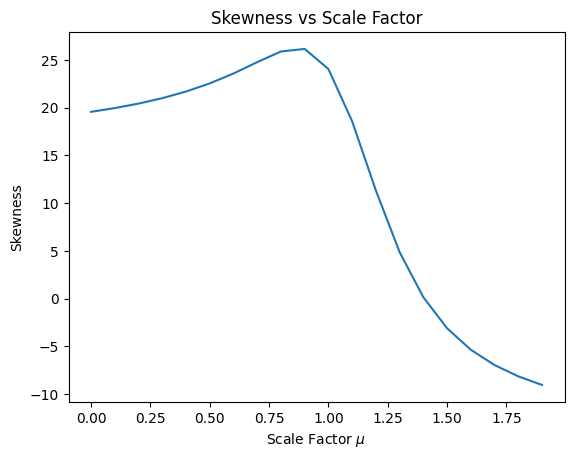

In [ ]:
#Import libraries
import os
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

#Prompts for name of file
def enterName(filterType):
    DataName = input("Enter " + filterType + " data file name: ")
    return DataName

#Open files and returns contained data
def getData(link):
    hdu = fits.open(link)
    data = hdu[0].data
    return data

#Subtracts one dataset from another according to a scale factor mu
def subtractData(data1, data2, mu):
    newData = data1 - (mu*data2)
    return newData

#Calculates skewness using function from paper
def calcSkewness(data):
    skewness = 0 #Temporary
    pixelCount = np.size(data)
    mean = data.mean()
    std = data.std()
    for row in range(0, len(data)):
        for col in range(0, len(data[0])):
            skewness += ((data[row, col] - mean)/std)**3
    skewness = skewness/(pixelCount-1)
    return skewness

#Compares different scale constants to determine which one results in a skewness closest to 0, and hence the most optimal
def determineBestMu(NBlink, BBlink):
    NBData = getData(NBlink)
    BBData = getData(BBlink)

    bestSkew = 1000000000.0
    bestMu = 1000000000.0
    skews = []
    mus = []
    for mu in np.arange(0.0, 2.0, 0.1):
        mus.append(mu)
        subtractedData = subtractData(NBData, BBData, mu)
        currSkew = calcSkewness(subtractedData)
        skews.append(currSkew)
        if abs(currSkew) < abs(bestSkew):
            bestSkew = currSkew
            bestMu = mu
    plt.plot(mus, skews)
    plt.xlabel(r"Scale Factor $\mu$")
    plt.ylabel("Skewness")
    plt.title("Skewness vs Scale Factor")
    return bestMu, bestSkew

#Start of Program
#Obtains names of datafiles
print("Ensure data files are within data folder")
#Enter names like "rim_Ha_wcs.fits"
NBDataName = enterName("NB")
BBDataName = enterName("BB")
NBDataLink = "data/" + NBDataName
BBDataLink = "data/" + BBDataName

#Checks for datafiles in folder, if not found ends program
filesInFolder = os.listdir("data")
if (NBDataName in filesInFolder) & (BBDataName in filesInFolder):
    print("Files Found")
    optMu, optSkew = determineBestMu(NBDataLink, BBDataLink)
    print("Most optimal scale factor = ", round(optMu, 2))
    print("Most optimal skewness = ", optSkew)
else:
    print("Files of submitted names not detected")

Text(0.5, 1.0, 'Original rim_Ha_wcs.fits Image')

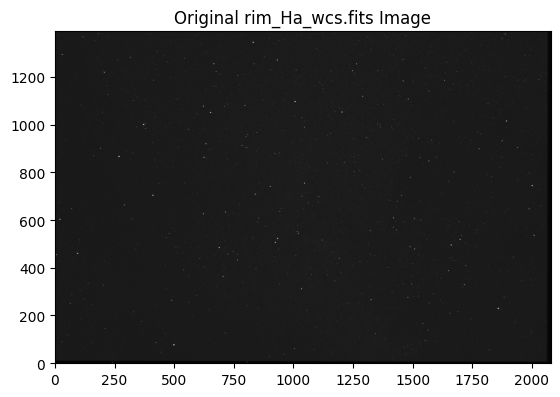

In [2]:
plt.imshow(getData(NBDataLink), origin = 'lower', cmap = 'gray')
plt.title("Original " + NBDataName + " Image")

Text(0.5, 1.0, 'Original rim_R_wcs.fits Image')

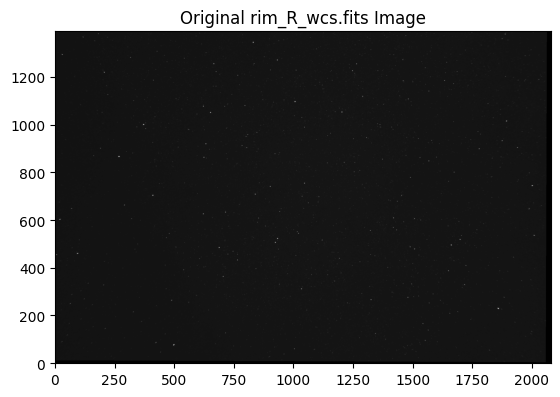

In [3]:
plt.imshow(getData(BBDataLink), origin = 'lower', cmap = 'gray')
plt.title("Original " + BBDataName + " Image")

Text(0.5, 1.0, 'Image with subtracted data')

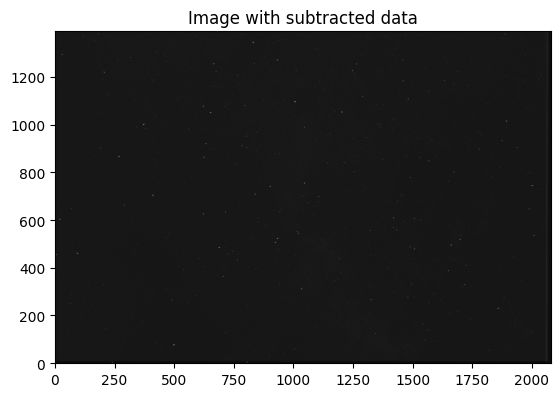

In [5]:
plt.imshow(subtractData(getData(NBDataLink), getData(BBDataLink), 0.7), origin = 'lower', cmap = 'gray')
plt.title("Image with subtracted data")